```bash
mentalist download_pubmlst -k 31 -o campy_mlst_fasta_files -s 29 --db campy_mlst.db
```

In [1]:
%run ../../multibench.py

In [2]:
from inspect import isfunction
import os, sys
import matplotlib.pyplot as plt
import asciitable
import sys
import os
import shutil
import numpy as np
import glob
from shutil import copyfile
import pathlib


# Summarize numpy array if it has more than 10 elements
np.set_printoptions(threshold=10)

def clean_if_exists(path):
    if os.path.exists(path):
        if(os.path.isfile(path)):
            os.remove(path)
        else:
            shutil.rmtree(path)
            os.mkdir(path)
def get_last_n_lines(string, n):
    return "\n".join(string.split("\n")[-n:])
def create_folder_if_doesnt_exist(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [3]:
input_samples = [os.path.basename(f) for f in glob.glob('input/*_1.fastq.gz')]
input_samples = [f.replace('_1.fastq.gz','') for f in input_samples]

# Prepare the gzipped concatenation of forward and backward reads
for input_sample in input_samples:
    os.system('cat input/%s_1.fastq.gz input/%s_2.fastq.gz > input/%s.fastq.gz' % (input_sample, input_sample, input_sample))

print(input_samples)

['PNUSAL001024', 'SH14-021', 'SH14-015', 'SH12-011', 'SH12-001', '2014D-0068', 'SH14-025', 'D7322', 'SH14-004', 'MOD1_LS998', '2014D-0070', 'PNUSA000196', 'SH14-003', 'SH12-012', 'SH10-014', 'SH12-010', 'PNUSAL000870', 'SH12-006', 'D7331', 'SH14-024', 'MOD1_LS989', 'SH12-013', 'CFSAN023467', 'SH14-005', 'SH14-014', 'D7334', 'MOD1_LS996', 'SH14-013', 'SH09-29', 'SH13-003', 'SH14-009', 'SH14-016', 'SH12-004', 'SH11-001', 'SH14-027', 'SH12-005', 'SH14-011', 'PNUSA000195', 'SH13-004', 'SH14-010', 'MOD1_LS1005', 'SH14-019', 'SH14-028', 'CFSAN023469', 'MOD1_LS995', 'D7316', 'MOD1_LS1008', 'SH13-001', 'SH14-012', '2014D-0067', 'SH14-001', 'SH08-001', 'PNUSA000194', 'MOD1_LS997', 'CFSAN023464', 'PNUSAL000957', 'MOD1_LS1011', 'D7323', 'SH10-30', 'D7330', 'D7327', 'SH11-002', 'SH13-002', 'SH12-007', 'SH13-006', 'SH14-023', 'CFSAN023466', 'SH14-022', 'SH14-008', 'D7321', '2014D-0189', 'SH12-009', 'D7329', 'SH10-002', 'D7333', 'MOD1_LS1003', 'CFSAN023471', 'SH14-017', 'MOD1_LS1009', 'MOD1_LS994', 

In [4]:
sample_sizes = list(range(1, 20, 3))
sample_sizes

[1, 4, 7, 10, 13, 16, 19]

In [5]:
def reset_func():
    #for file in glob.glob("output/*.txt"):
    #    clean_if_exists(file)
    pass
    
def benchmark_list_to_results(benchmark_firsts_list):
    return {
        "memory": max(list(map(lambda result: result.memory.max, benchmark_firsts_list))),
        "disk_read": max(list(map(lambda result: result.disk.read_chars, benchmark_firsts_list))),
        "disk_write": max(list(map(lambda result: result.disk.write_chars, benchmark_firsts_list))),
        "runtime": sum(list(map(lambda result: result.process.execution_time, benchmark_firsts_list)))
    }

def sampling_func(sample_size):
    samples = input_samples[:sample_size]
    return samples

assemble_command = {
    "command": "mentalist call -o output/%.txt -s % --db campy_mlst.db input/%.fastq.gz",
    "parallel_args": "-j 1 -I%"
}

# active_output_print: prints stdout and stderr on every iteration
multibench_results, debug_str = multi_cmdbench({
"call": [assemble_command]
}, reset_func = reset_func, iterations = 2, sampling_func = sampling_func, sample_sizes = sample_sizes, 
    benchmark_list_to_results = benchmark_list_to_results, active_output_print = False, progress_bar = True)


In [6]:
save_path = "multibench_results.txt"

samples_per_sample_size = []
for sample_size in sample_sizes:
        samples_per_sample_size.append(input_samples[:sample_size])

save_multibench_results(multibench_results, samples_per_sample_size, save_path)

In [7]:
read_path = "multibench_results.txt"

multibench_results, samples_per_sample_size = read_multibench_results(read_path)
print(samples_per_sample_size)

[['PNUSAL001024'], ['PNUSAL001024,', 'SH14-021,', 'SH14-015,', 'SH12-011'], ['PNUSAL001024,', 'SH14-021,', 'SH14-015,', 'SH12-011,', 'SH12-001,', '2014D-0068,', 'SH14-025'], ['PNUSAL001024,', 'SH14-021,', 'SH14-015,', 'SH12-011,', 'SH12-001,', '2014D-0068,', 'SH14-025,', 'D7322,', 'SH14-004,', 'MOD1_LS998'], ['PNUSAL001024,', 'SH14-021,', 'SH14-015,', 'SH12-011,', 'SH12-001,', '2014D-0068,', 'SH14-025,', 'D7322,', 'SH14-004,', 'MOD1_LS998,', '2014D-0070,', 'PNUSA000196,', 'SH14-003'], ['PNUSAL001024,', 'SH14-021,', 'SH14-015,', 'SH12-011,', 'SH12-001,', '2014D-0068,', 'SH14-025,', 'D7322,', 'SH14-004,', 'MOD1_LS998,', '2014D-0070,', 'PNUSA000196,', 'SH14-003,', 'SH12-012,', 'SH10-014,', 'SH12-010'], ['PNUSAL001024,', 'SH14-021,', 'SH14-015,', 'SH12-011,', 'SH12-001,', '2014D-0068,', 'SH14-025,', 'D7322,', 'SH14-004,', 'MOD1_LS998,', '2014D-0070,', 'PNUSA000196,', 'SH14-003,', 'SH12-012,', 'SH10-014,', 'SH12-010,', 'PNUSAL000870,', 'SH12-006,', 'D7331']]


In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 15, 3

[{'runtime': 8.155, 'memory': 314767360.0, 'disk_read': 19935939.5, 'disk_write': 1529016.5}, {'runtime': 32.595, 'memory': 314652672.0, 'disk_read': 75305982.0, 'disk_write': 4071039.5}, {'runtime': 56.45, 'memory': 314613760.0, 'disk_read': 130435750.5, 'disk_write': 6615485.0}, {'runtime': 80.84, 'memory': 315326464.0, 'disk_read': 185739200.0, 'disk_write': 9171546.5}, {'runtime': 107.16, 'memory': 315092992.0, 'disk_read': 240834274.0, 'disk_write': 11753521.0}, {'runtime': 132.92, 'memory': 315457536.0, 'disk_read': 295988700.0, 'disk_write': 14299150.0}, {'runtime': 156.25, 'memory': 315635712.0, 'disk_read': 351078430.5, 'disk_write': 16840585.0}]


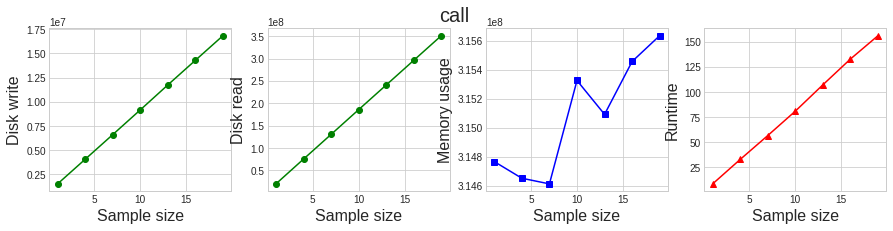

In [10]:
# Indexing Plots
plot_resources(multibench_results, sample_sizes, "call")